In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
btc_lobs = pd.read_csv('drive/My Drive/btc-lobs.csv')
btc_trades = pd.read_csv('drive/My Drive/btc-trades.csv')

eth_lobs = pd.read_csv('drive/My Drive/eth-lobs.csv')
eth_trades = pd.read_csv('drive/My Drive/eth-trades.csv')

Задача 1 Построить графики, как ведут себя best уровни стаканов (файл lobs) и price проведённых сделок (файл trades) во времени.

In [ ]:
btc_lobs.head(10)

,receive_ts,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,btcusdt:Binance:LinearPerpetual_bid_price_7,btcusdt:Binance:LinearPerpetual_bid_vol_7,btcusdt:Binance:LinearPerpetual_ask_price_8,btcusdt:Binance:LinearPerpetual_ask_vol_8,btcusdt:Binance:LinearPerpetual_bid_price_8,btcusdt:Binance:LinearPerpetual_bid_vol_8,btcusdt:Binance:LinearPerpetual_ask_price_9,btcusdt:Binance:LinearPerpetual_ask_vol_9,btcusdt:Binance:LinearPerpetual_bid_price_9,btcusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.7,4.455,19980.1,0.010,19975.6,1.529,19980.2,0.010,19975.4,1.641
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
2,1655942403346968722,1655942403346000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
3,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
4,1655942404452706766,1655942404452000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
5,1655942404488775046,1655942404488000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
6,1655942404752033322,1655942404751000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
7,1655942405044733617,1655942405044000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
8,1655942405249754884,1655942405249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.010,19975.8,0.686,19980.2,0.010,19975.7,4.455
9,1655942405308799489,1655942405308000000,19978.0,1.282,19977.9,2.353,19978.5,0.001,19977.8,4.703,...,19976.4,0.050,19980.8,0.002,19976.1,0.146,19981.0,0.011,19976.0,0.205


In [ ]:
btc_trades.head(10)

,receive_ts,exchange_ts,aggro_side,price,size
0,1655942402624789714,1655942402623000000,BID,19977.5,0.001
1,1655942405293556247,1655942405292000000,BID,19977.5,0.041
2,1655942405293628020,1655942405292000000,BID,19977.5,0.036
3,1655942405293832021,1655942405292000000,BID,19977.5,0.001
4,1655942405293929517,1655942405292000000,BID,19977.5,0.001
5,1655942405294003345,1655942405292000000,BID,19977.8,0.003
6,1655942405294140676,1655942405292000000,BID,19977.9,0.003
7,1655942405294206928,1655942405292000000,BID,19978.0,0.001
8,1655942408891268324,1655942408890000000,ASK,19977.9,0.020
9,1655942409197011118,1655942409193000000,BID,19978.0,0.058


In [ ]:
%matplotlib inline

In [ ]:
scaled_time = btc_lobs['receive_ts'].apply(lambda milsec : pd.datetime.fromtimestamp(milsec / 1e9))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


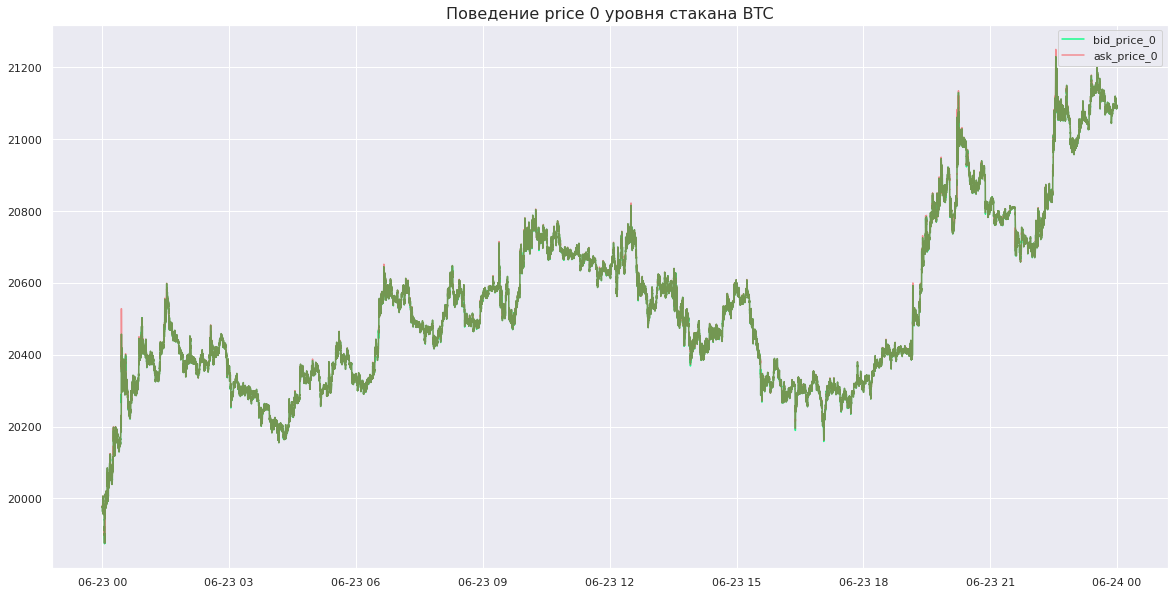

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


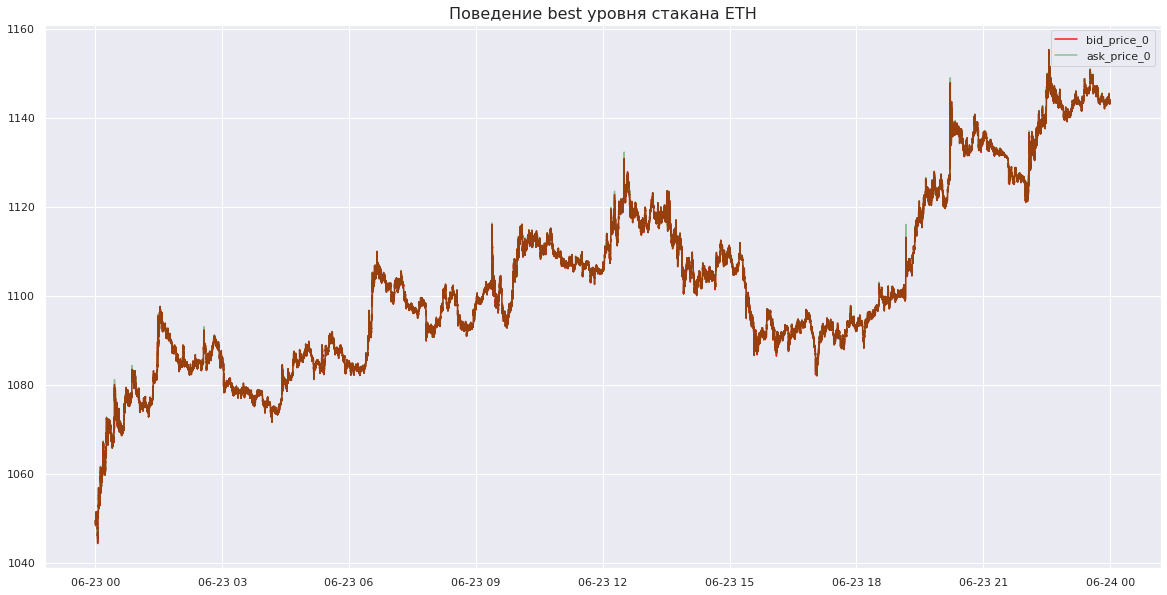

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(scaled_time, btc_lobs['btcusdt:Binance:LinearPerpetual_bid_price_0'], c='springgreen', label='bid_price_0', alpha=0.9)
plt.plot(scaled_time, btc_lobs['btcusdt:Binance:LinearPerpetual_ask_price_0'], c='red', label='ask_price_0', alpha=0.4)

plt.title('Поведение price 0 уровня стакана BTC', fontsize=16)
plt.legend(loc='best')
plt.show();

plt.figure(figsize=(20, 10))

scaled_time = eth_lobs['receive_ts'].apply(lambda milsec : pd.datetime.fromtimestamp(milsec / 1e9))


plt.plot(scaled_time, eth_lobs['ethusdt:Binance:LinearPerpetual_bid_price_0'], c='red', label='bid_price_0', alpha=0.9)
plt.plot(scaled_time, eth_lobs['ethusdt:Binance:LinearPerpetual_ask_price_0'], c='green', label='ask_price_0', alpha=0.4)

plt.title('Поведение best уровня стакана ETH', fontsize=16)
plt.legend(loc='best');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Поведение price проведенных сделок BTC')

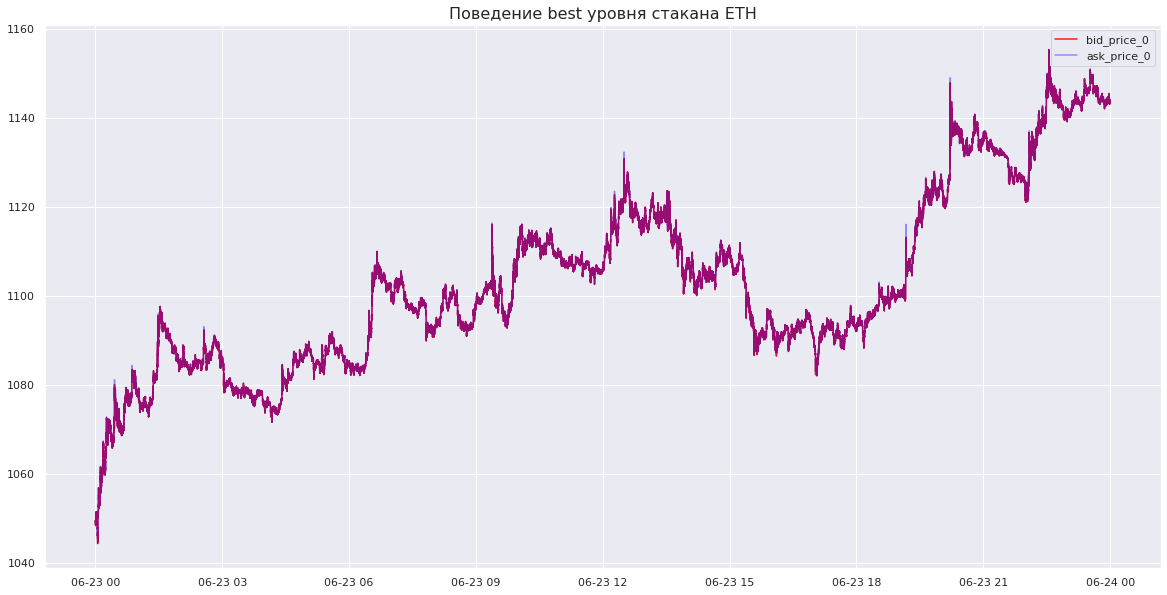

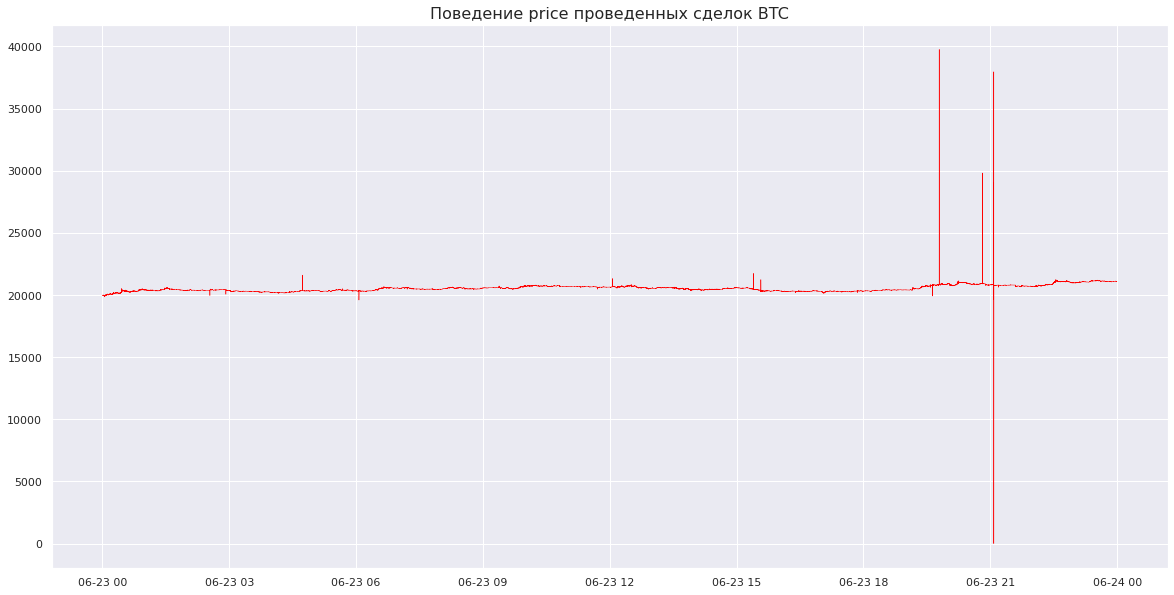

In [ ]:
plt.figure(figsize=(20, 10))

scaled_time = eth_lobs['receive_ts'].apply(lambda milsec : pd.datetime.fromtimestamp(milsec / 1e9))

plt.plot(scaled_time, eth_lobs['ethusdt:Binance:LinearPerpetual_bid_price_0'], c='red', label='bid_price_0', alpha=0.9)
plt.plot(scaled_time, eth_lobs['ethusdt:Binance:LinearPerpetual_ask_price_0'], c='blue', label='ask_price_0', alpha=0.4)
plt.title('Поведение best уровня стакана ETH', fontsize=16)
plt.legend(loc='best');

plt.figure(figsize=(20, 10))
scaled_time = btc_trades['receive_ts'].apply(lambda milsec : pd.datetime.fromtimestamp(milsec / 1e9))

plt.plot(scaled_time, btc_trades['price'], c='red', linewidth=0.5)
plt.title('Поведение price проведенных сделок BTC', fontsize=16)


Задача 2 Посчитать статистики: 0.05 и 0.95 квантили, медиана, средняя, дисперсия для любой из указанных величин на выбор: размер трейда, объём какого-то фиксированного уровня стакана.

In [ ]:
print('трейд BTC: ')
print( np.quantile(btc_trades['size'], 0.05), '0.05 квантиль ')
print( np.quantile(btc_trades['size'], 0.95), '0.95 квантиль ')
print( btc_trades['size'].median(), 'mедиана ')
print( btc_trades['size'].mean(), 'cреднее ')
print( btc_trades['size'].var(), 'дисперсия ')

print('трейд ETH: ')
print( np.quantile(eth_trades['size'], 0.05), '0.05 квантиль ')
print( np.quantile(eth_trades['size'], 0.95), '0.95 квантиль ')
print( eth_trades['size'].median(), 'mедиана ')
print( eth_trades['size'].mean(), 'cреднее ')
print( eth_trades['size'].var(), 'дисперсия ')

трейд BTC: 
0.001 0.05 квантиль 
0.519 0.95 квантиль 
0.017 mедиана 
0.12200803165102181 cреднее 
0.31323175143229426 дисперсия 
трейд ETH: 
0.005 0.05 квантиль 
5.0 0.95 квантиль 
0.153 mедиана 
1.2198729337234182 cреднее 
40.11740031016206 дисперсия 
